## Import data

In [1]:
import sys
sys.path.append('..')
from pipeline import ResultsPipe

`subject_code` - any string for naming result files.

`path_to_eeg` - can be any type of eeg file that MNE's [read_raw](https://mne.tools/stable/generated/mne.io.read_raw.html) function supports.

`output_directory` - a directory you want the results to be saved in

`path_to_hypno` - visbrain's [point-per-second](http://visbrain.org/sleep.html#save-hypnogram) type of hypnogram

`sf_hypno` - hypnogram sampling frequency (visbrain's hypnograms default to 1)

In [2]:
results_pipe = ResultsPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1)

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


07-Mar-23 00:40:10 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


### Hypnospectrogram

Setting 192715 of 2229773 (8.64%) samples to NaN, retaining 2037058 (91.36%) samples.


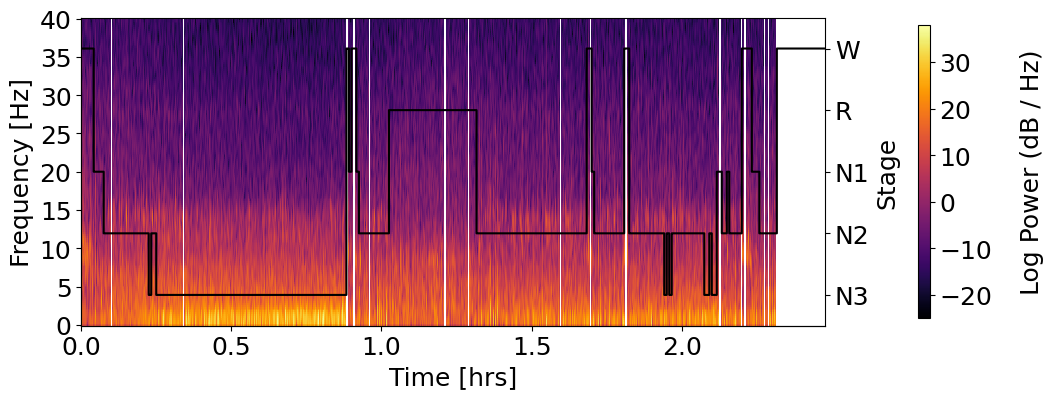

In [3]:
results_pipe.plot_hypnospectrogram(
    picks=['E101'],
    win_sec=4,
    freq_range=(0, 40),
    cmap='inferno',
    overlap=True,
    save=True)

### Power Spectral Density

Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...
Setting 192715 of 2229773 (8.64%) samples to NaN, retaining 2037058 (91.36%) samples.


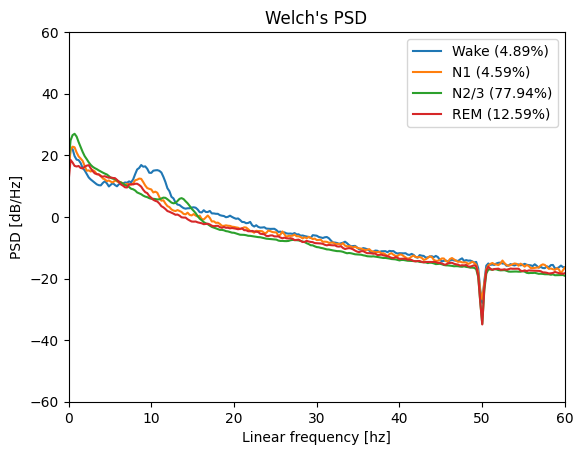

In [4]:
results_pipe.plot_psd_per_stage(
    picks=['E101'], 
    sec_per_seg=4.096,
    psd_range=(-60, 60),
    freq_range=(0, 60),
    xscale='linear',
    sleep_stages={'Wake' :0, 'N1' :1, 'N2/3': (2,3), 'REM': 4},
    save=True)

### Topomaps

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 192715 of 2229773 (8.64%) samples to NaN, retaining 2037058 (91.36%) samples.


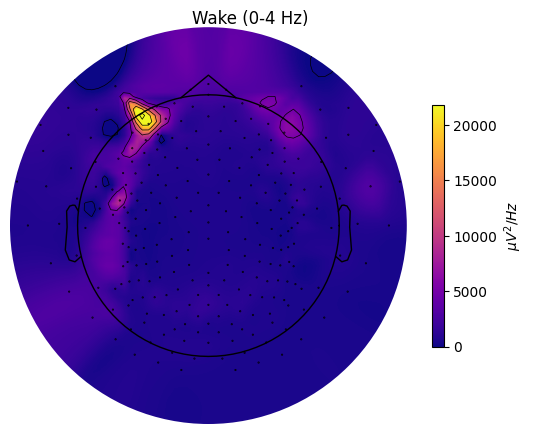

In [5]:
results_pipe.plot_topomap(
    stage='Wake',
    bandwidth = (0, 4),
    sleep_stages={'Wake': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'REM': 4},
    sec_per_seg=4.096,
    dB=False,
    save=True
)

In [6]:
del results_pipe.psd_per_stage

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 192715 of 2229773 (8.64%) samples to NaN, retaining 2037058 (91.36%) samples.


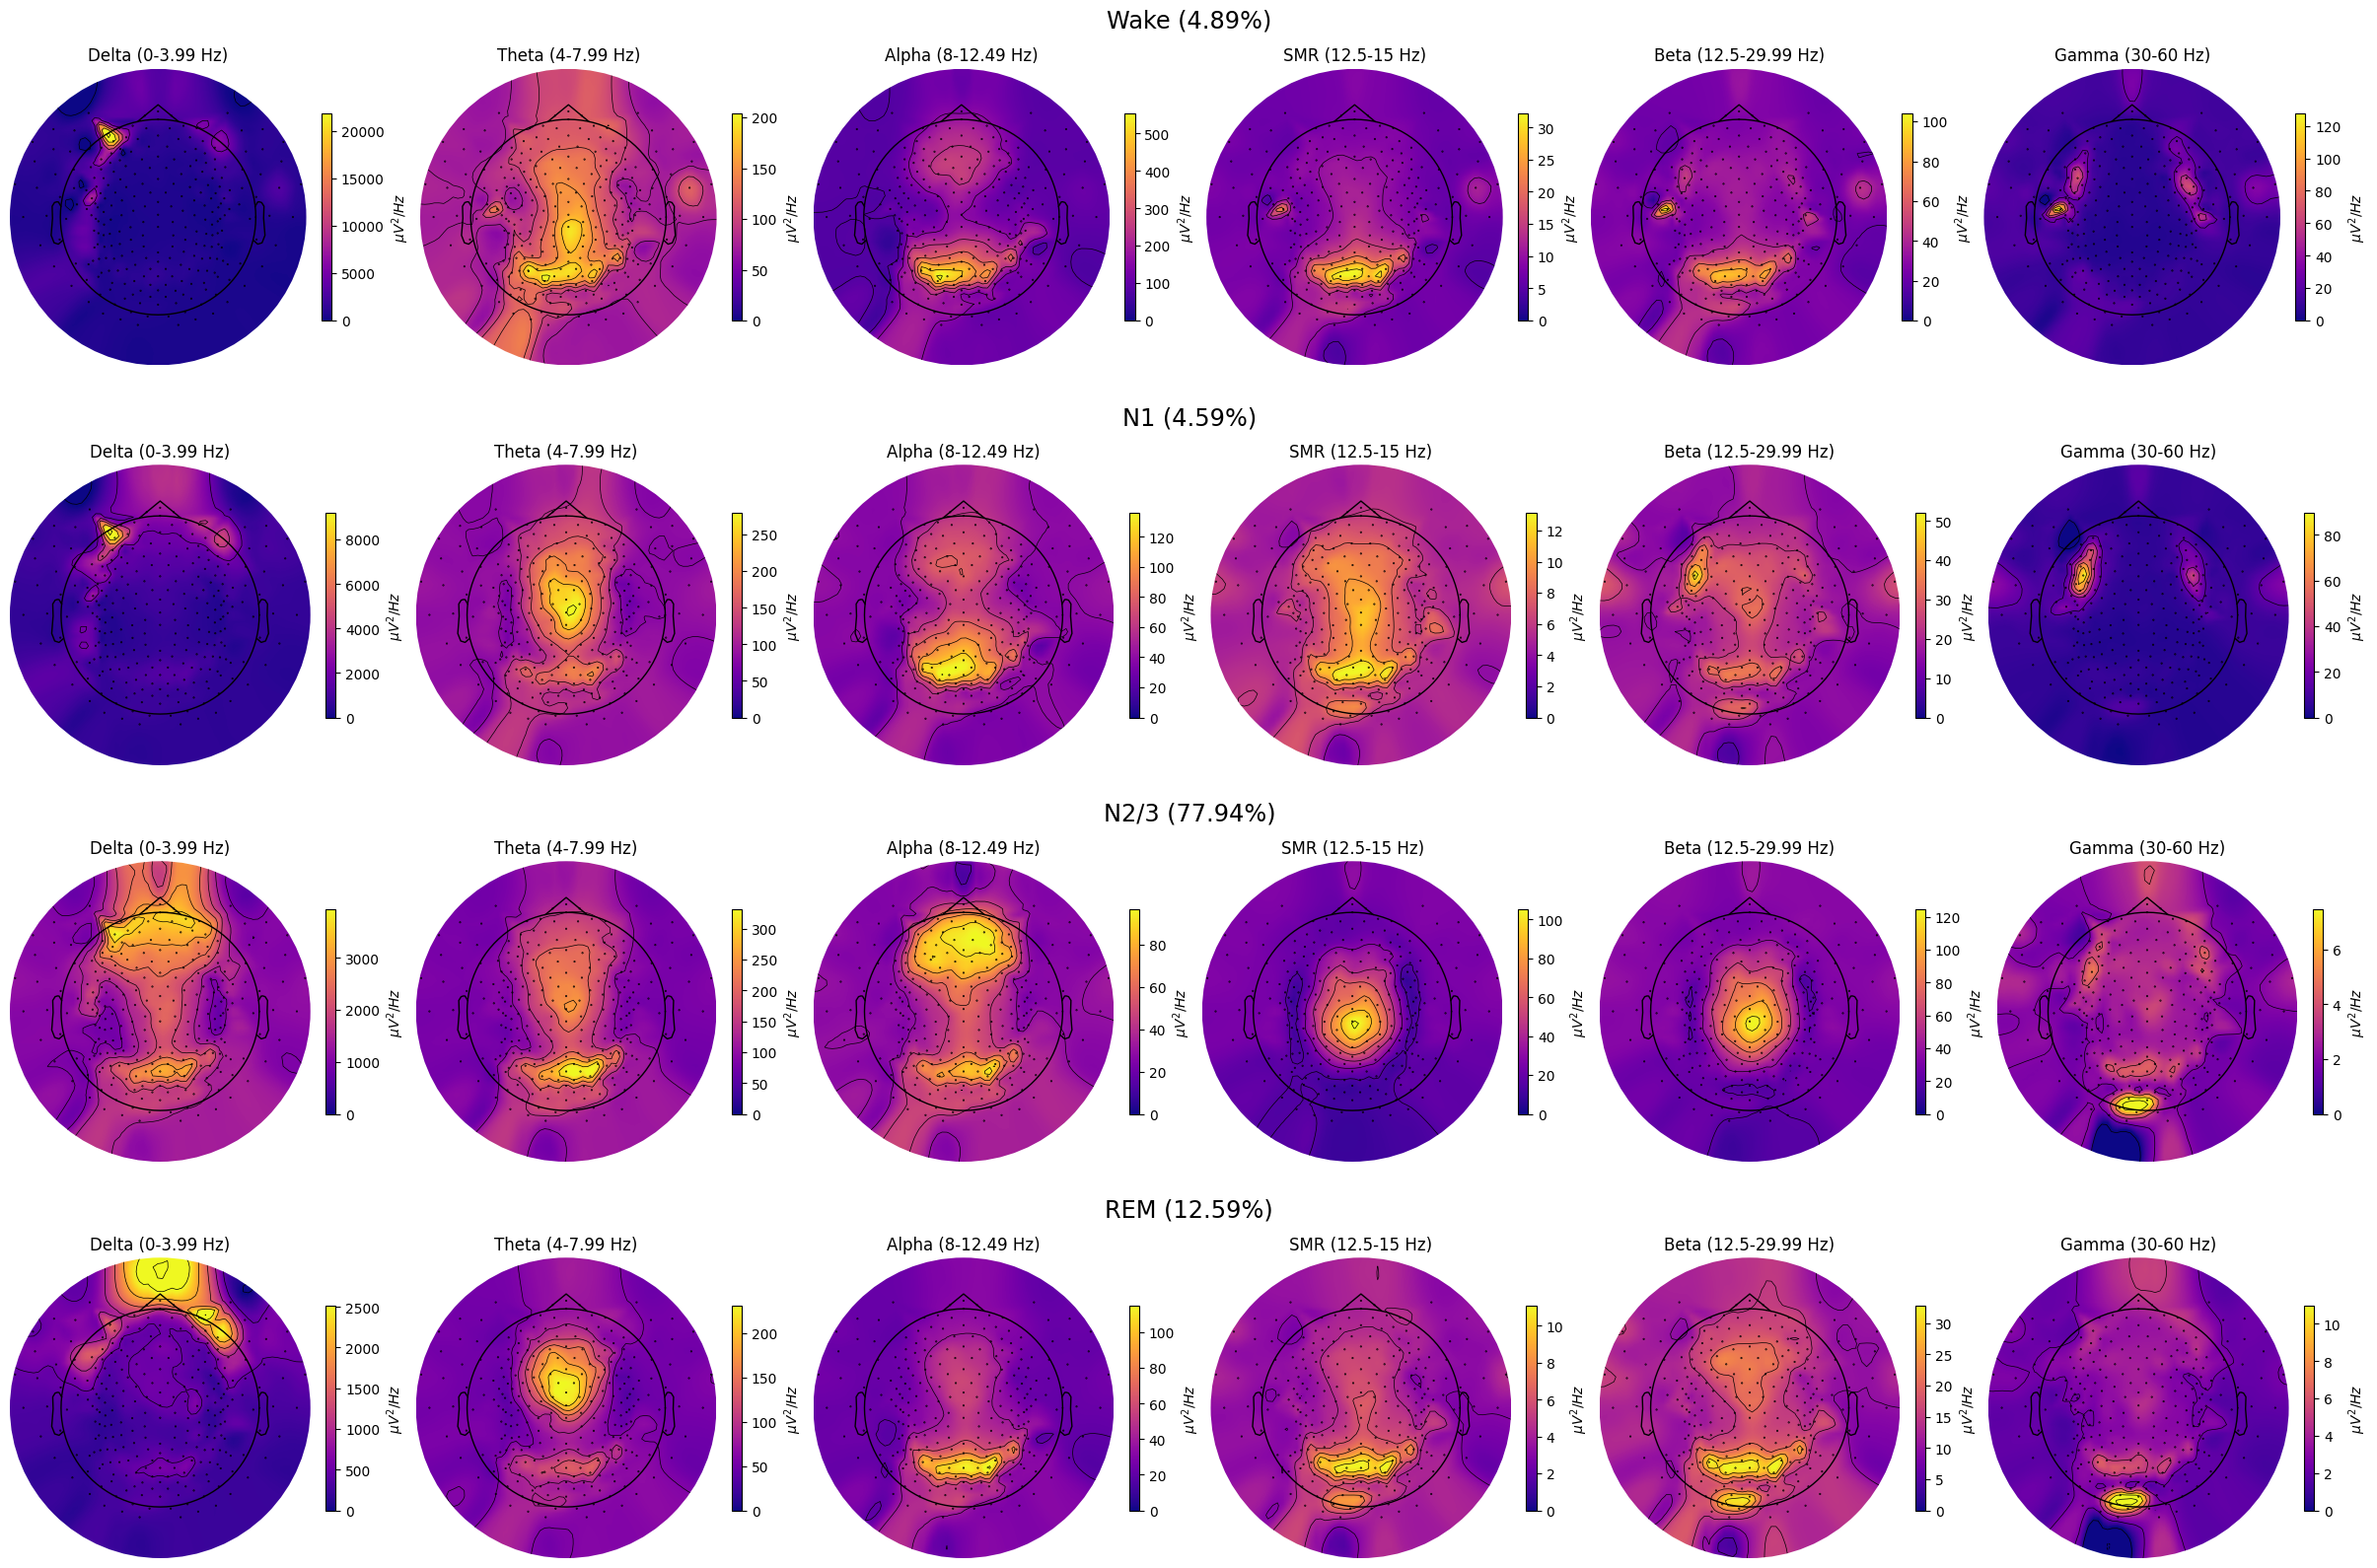

In [7]:
results_pipe.plot_topomap_collage(
    bands = {'Delta': (0, 3.99), 'Theta': (4, 7.99),
            'Alpha': (8, 12.49), 'SMR': (12.5, 15), 
            'Beta': (12.5, 29.99), 'Gamma': (30, 60)},
    sleep_stages={'Wake' :0, 'N1' :1, 'N2/3': (2,3), 'REM': 4},
    stages_to_plot=None,  # None defaults to all sleep_stages
    sec_per_seg=4.096,  
    save=True
)

### Sleep Stats

In [8]:
results_pipe.sleep_stats(save_to_csv=True)